<a href="https://colab.research.google.com/github/JLUNGOOD/PCVK_01/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Alwan Alawi

Kelaas : TI-3A

Absen : 09

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


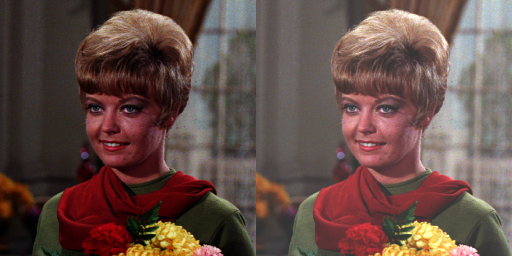

In [5]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa loop
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKRIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

Inverse Citra
---------------------


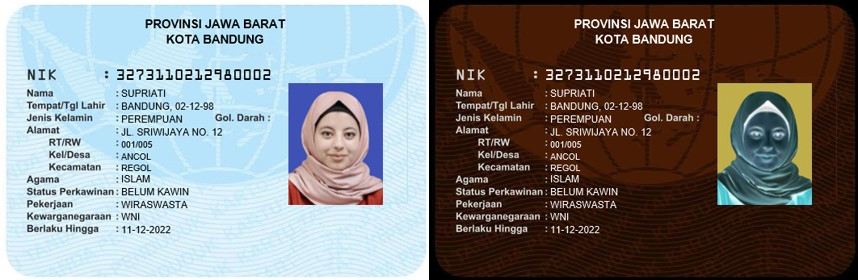

In [6]:
print('Inverse Citra')
print('---------------------')

#membaca citra menggunakan array numpy
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpg')

#menghitung citra negatif/invers dengan rumus: g(x) = 255 - f(x)
inverse_image = 255 - original

#menampilkan citra asli dan inverse
final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Contras Citra
---------------------
Masukan tingkat kecerahan (-255 - 255): 100
Masukan tingkat kontras (1.0 - 3.0): 2


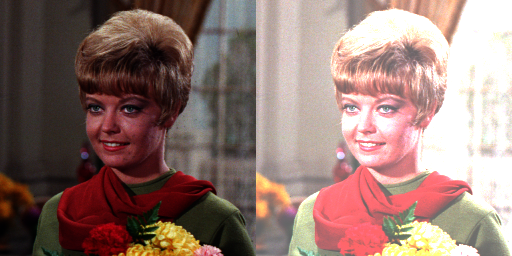

In [7]:
print('Contras Citra')
print('---------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan (-255 - 255): '))
except ValueError:
  print('Eror, not a number')

try:
  contrast = int(input('Masukan tingkat kontras (1.0 - 3.0): '))
except ValueError:
  print('Eror, not a number')

#membaca citra menggunakan array numpy
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

#mengubah kontras dan kecerahan dengan rumus
contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

#menampilkan citra asli dan hasil
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah citra dengan trasnformasi logaritmic brightness
----------------------------------------------


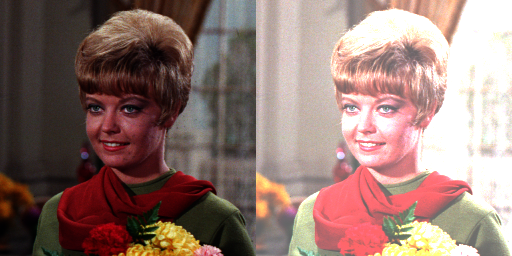

In [8]:
print('Mengubah citra dengan trasnformasi logaritmic brightness')
print('----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

#mengubah citra ke grayscale (r)
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

#menghitung nilai konstanta (c)
c = 255 / np.log(1 + gray_image)

#menghitung nilai piksel baru dengan fungsi logaritma (s)
log_image = c * np.log(1 + gray_image)

#memastikan citra asli dan hasil
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

Mengubah citra dengan transformasi grayscale menggunakan metode average, lightness, dan luminance
-------------------------------------------------------


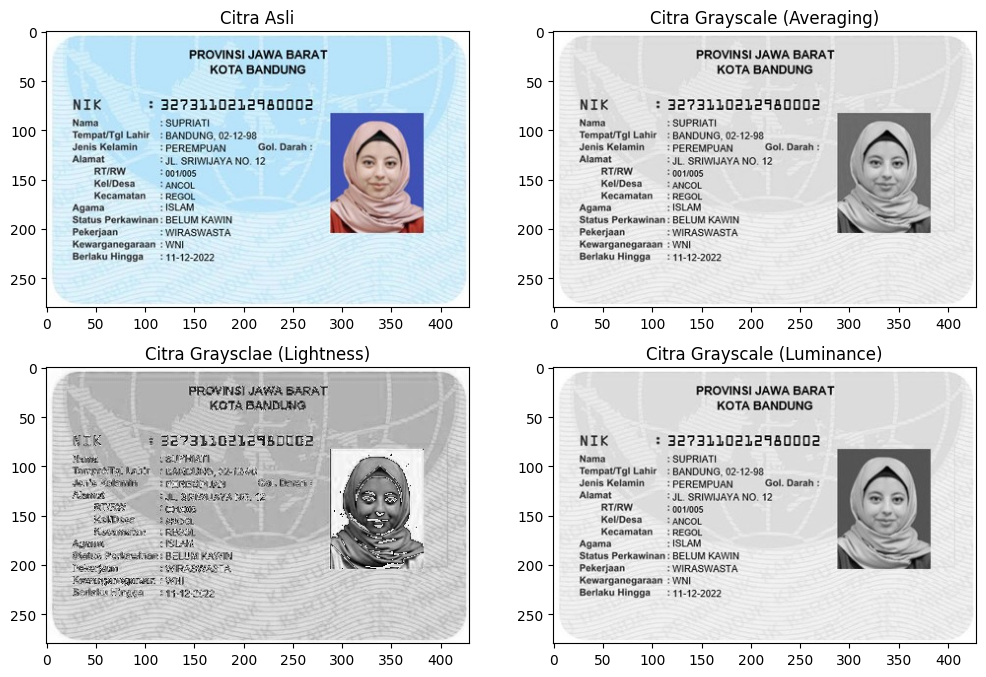

In [13]:
print('Mengubah citra dengan transformasi grayscale menggunakan metode average, lightness, dan luminance')
print('-------------------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpg')

#mengubah citra ke RGB
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

#menghitung nilai piksel baru dengan metode averaging
averaging_ktp = np.mean(original, axis=2)

#menghitung nilai piksel baru dengan metode lightness
min_ktp = np.min(original, axis=2)
max_ktp = np.max(original, axis=2)
lightness_ktp = (min_ktp + max_ktp) / 2

#menghitung nilai piksel baru dengan metode luminance
luminance_ktp  = 0.21 * original[:,:,0] + 0.72 *original[:,:,1] + 0.07 * original[:,:,2]

#menampilkan citra asli dan hasil
plt.figure(figsize=(12,8)) #fungsi plt.figure adalah untuk membuat sebuah objek figure, yaitu wadah untuk menampilkan satu atau lebih
plt.subplot(221) #untuk membuat sebuah objek axes, yaitu area utuk menampilkan plot
plt.imshow(original)
plt.title('Citra Asli')
plt.subplot(222)
plt.imshow(averaging_ktp, cmap='gray')
plt.title('Citra Grayscale (Averaging)')
plt.subplot(223)
plt.imshow(lightness_ktp, cmap='gray')
plt.title('Citra Graysclae (Lightness)')
plt.subplot(224)
plt.imshow(luminance_ktp, cmap='gray')
plt.title('Citra Grayscale (Luminance)')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

Menampilkan warna biru pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale
--------------------------------------------


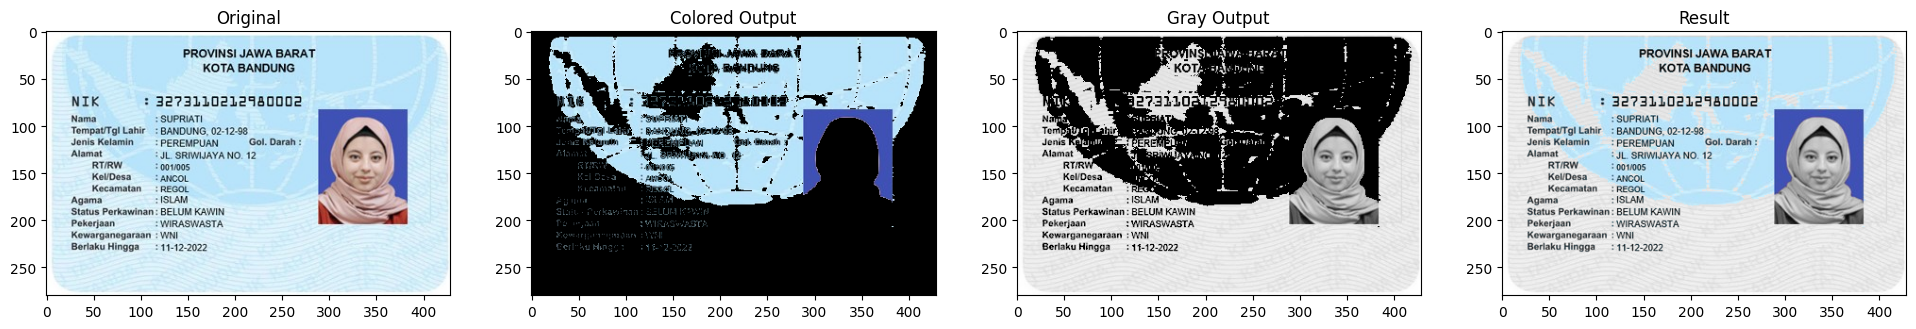

In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


print('Menampilkan warna biru pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale')
print('--------------------------------------------')


original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpg')

# Ubah gambar dari BGR ke RGB
img_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Ubah gambar ke grayscale dan gabungkan channelnya
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])

# Ubah gambar ke ruang warna HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Tentukan batas untuk warna biru dalam ruang warna HSV
lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower, upper)

# Ambil bagian biru dari gambar
colored_output = cv.bitwise_and(original, original, mask=mask)

# Ubah bagian non-biru menjadi grayscale
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)

# Gabungkan bagian biru
result = cv.add(colored_output, gray_output)

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(24, 16))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(colored_output, cv.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(gray_output, cv.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result')

plt.show()